In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('datasets/dfEN-update.csv')

In [4]:
df.head(3)

,Unnamed: 0,user,date,likeCount,tweetText,hashtags,lang,replies,retweetCount,replyCount
0,0,jdemay,2023-02-05 23:59:16+00:00,0,Planning to use #ChatGPT to help you with high...,['ChatGPT'],en,0.0,0.0,NaN
1,1,CarlosSilvaB81,2023-02-05 23:58:51+00:00,3,"@Carmtans @stkirsch Chat gpt, is nothing but a...",NaN,en,0.0,0.0,NaN
2,2,saadnajeebsaad,2023-02-05 23:58:15+00:00,0,#WeatherUpdate #Karachi #Khi #TempUpdate #Sunr...,"['WeatherUpdate', 'Karachi', 'Khi', 'TempUpdat...",en,0.0,0.0,NaN


In [5]:
df.tail(3)

,Unnamed: 0,user,date,likeCount,tweetText,hashtags,lang,replies,retweetCount,replyCount
287306,287306,ChatGPT_Trading,2022-09-15 13:24:10+00:00,1,"$SPY $QQQ Expected decent gap down , let's see...",NaN,en,0.0,0.0,NaN
287307,287307,ChatGPT_Trading,2022-09-15 13:22:44+00:00,0,@bitinblock sure,NaN,en,0.0,0.0,NaN
287308,287308,ChatGPT_Trading,2022-09-15 12:37:14+00:00,8,$ADBE fire 🔥 https://t.co/O54xRyaVtm,NaN,en,4.0,0.0,NaN


In [6]:
df.shape

(287309, 10)

In [7]:
df.columns

Index(['Unnamed: 0', 'user', 'date', 'likeCount', 'tweetText', 'hashtags',
       'lang', 'replies', 'retweetCount', 'replyCount'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Unnamed: 0           0
user              6708
date                 0
likeCount            0
tweetText            0
hashtags        109440
lang                 0
replies           5596
retweetCount       107
replyCount      281713
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287309 entries, 0 to 287308
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    287309 non-null  int64  
 1   user          280601 non-null  object 
 2   date          287309 non-null  object 
 3   likeCount     287309 non-null  int64  
 4   tweetText     287309 non-null  object 
 5   hashtags      177869 non-null  object 
 6   lang          287309 non-null  object 
 7   replies       281713 non-null  float64
 8   retweetCount  287202 non-null  float64
 9   replyCount    5596 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 21.9+ MB


In [12]:
df.drop(['Unnamed: 0'], axis=1, inplace= True)
df.head(3)

,user,date,likeCount,tweetText,hashtags,lang,replies,retweetCount,replyCount
0,jdemay,2023-02-05 23:59:16+00:00,0,Planning to use #ChatGPT to help you with high...,['ChatGPT'],en,0.0,0.0,NaN
1,CarlosSilvaB81,2023-02-05 23:58:51+00:00,3,"@Carmtans @stkirsch Chat gpt, is nothing but a...",NaN,en,0.0,0.0,NaN
2,saadnajeebsaad,2023-02-05 23:58:15+00:00,0,#WeatherUpdate #Karachi #Khi #TempUpdate #Sunr...,"['WeatherUpdate', 'Karachi', 'Khi', 'TempUpdat...",en,0.0,0.0,NaN


In [13]:
df.describe() # controllo i valori relativi al numero di Like --> andamento esponenziale e Replies

,likeCount,replies,retweetCount,replyCount
count,287309.000000,281713.000000,287202.000000,5596.000000
mean,7.867265,0.896405,1.301990,0.456040
std,236.145481,22.966317,31.492156,2.446722
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,0.000000
max,62862.000000,6009.000000,8815.000000,71.000000


In [14]:
df.nunique()

user            115881
date            166723
likeCount          756
tweetText       191160
hashtags         48806
lang                 1
replies            192
retweetCount       316
replyCount          28
dtype: int64

In [15]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [16]:
most_frequent_values(df) #cerco numero di like e replies più frequente

,user,date,likeCount,tweetText,hashtags,lang,replies,retweetCount,replyCount
Total,280601,287309,287309,287309,177869,287309,281713,287202,5596
Most frequent item,richardkimphd,2023-03-30 00:00:00+00:00,0,@aymeric_ugc Chat GPT,['ChatGPT'],en,0.0,0.0,0.0
Frequence,1129,8426,134814,643,49190,287309,195816,229818,4467
Percent from total,0.402,2.933,46.923,0.224,27.655,100.0,69.509,80.02,79.825


# Faccio studi su andamento dei valori --> tutti andamento esponenziale

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df['user'].unique()

array(['jdemay', 'CarlosSilvaB81', 'saadnajeebsaad', ..., 'crazy_chatgpt',
       'AI_chatGPT_', 'chatgpt___'], dtype=object)

In [19]:
# Calcolo il numero di post per username
df['user'].value_counts()

richardkimphd     1129
PhilippeJB_PJB    1027
MidJourneyAI_      921
chat_gpt_ai        788
VeilleCyber3       462
                  ... 
Elmarekotze          1
MsStephKayB          1
TanBep               1
TripleDubMedia       1
chatgpt___           1
Name: user, Length: 115881, dtype: int64

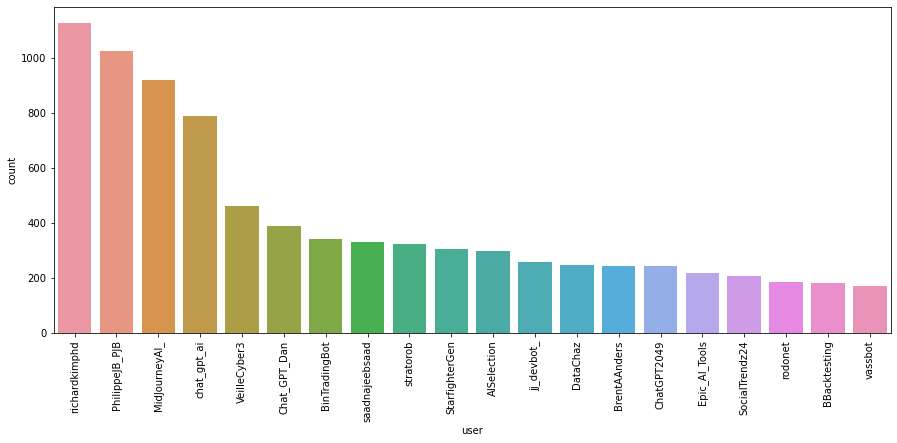

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='user', order=df["user"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

In [21]:
df.head(3)

,user,date,likeCount,tweetText,hashtags,lang,replies,retweetCount,replyCount
0,jdemay,2023-02-05 23:59:16+00:00,0,Planning to use #ChatGPT to help you with high...,['ChatGPT'],en,0.0,0.0,NaN
1,CarlosSilvaB81,2023-02-05 23:58:51+00:00,3,"@Carmtans @stkirsch Chat gpt, is nothing but a...",NaN,en,0.0,0.0,NaN
2,saadnajeebsaad,2023-02-05 23:58:15+00:00,0,#WeatherUpdate #Karachi #Khi #TempUpdate #Sunr...,"['WeatherUpdate', 'Karachi', 'Khi', 'TempUpdat...",en,0.0,0.0,NaN


In [23]:
df['replies'].unique()

array([0.000e+00, 1.000e+00, 2.000e+00, 7.000e+00, 3.000e+00, 6.000e+00,
       4.000e+00, 8.000e+00, 5.000e+00, 1.300e+01, 1.200e+01, 2.600e+01,
       1.600e+01, 5.440e+02, 1.000e+01, 1.400e+01, 3.500e+01, 2.200e+01,
       9.000e+00, 3.100e+01, 1.700e+01, 2.100e+01, 4.500e+01, 4.200e+01,
       1.100e+01, 1.900e+01, 1.500e+01, 5.300e+01, 2.800e+01, 4.400e+01,
       3.200e+01, 2.900e+01, 3.000e+01, 6.000e+01, 2.700e+01, 7.000e+01,
       9.800e+01, 3.600e+01, 8.400e+01, 2.400e+01, 2.300e+01, 4.800e+01,
       1.800e+01, 2.140e+02, 7.900e+01, 2.700e+02, 5.000e+01, 6.700e+01,
       2.000e+01, 1.390e+02, 1.030e+02, 7.100e+01, 1.598e+03, 3.300e+01,
       7.200e+01, 5.600e+01, 1.910e+02, 7.800e+01, 2.940e+02, 1.460e+02,
       3.800e+01, 2.500e+01, 4.100e+01, 6.300e+01, 4.300e+01, 1.040e+02,
       5.800e+01, 6.330e+02, 5.500e+01, 3.900e+01, 1.170e+02, 6.009e+03,
       1.340e+02, 9.700e+01, 5.700e+01, 3.440e+02, 7.700e+01, 2.580e+02,
       5.400e+01, 1.050e+02, 2.360e+02, 6.340e+02, 

In [24]:
len(df['replies'].unique()) #numero di valori per il conteggio dei Reply

193

In [25]:
df['replies'].value_counts()

0.0      195816
1.0       60995
2.0       12121
3.0        4275
4.0        2246
          ...  
147.0         1
172.0         1
165.0         1
223.0         1
333.0         1
Name: replies, Length: 192, dtype: int64

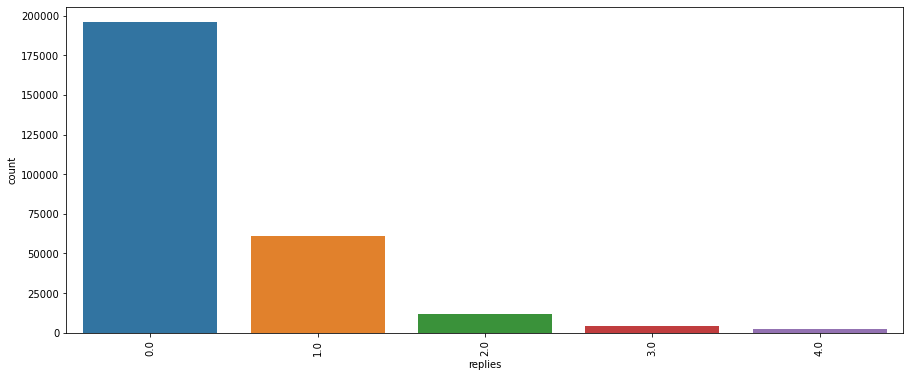

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='replies', order=df["replies"].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

In [27]:
df['likeCount'].unique()

array([    0,     3,     1,     5,     9,    28,     2,     4,    35,
          14,     6,    10,     7,    13,    11,    47,    19,    17,
          15,    21,    44,    24,    64,   137,    36,    31,    22,
         214,   117,     8,   224,    16,    23,    12,    27,   369,
         465,    25,    46,    74,    20,    41,   310,    51,    77,
         398,    37,    52,   940,   298,    70,    39,   120,    40,
         118,    63,    78,    82,    18,    72,    26,    66,    38,
          84,    56,    75,    45,   140,   292,   233,   312,   110,
          33,   423,    98,    57,   124,    29,    32,    49,   145,
          42,    53,    50,    68,   125,    65,    69,   942,   349,
         525,   569,   428,    34,    61,    60,    55,   441,    48,
         106,   119,   289,   122,   462,   323,   186,   191,   239,
          62,    30,    96,   372,   938,    87,   878,    79,    89,
          99,    43,   153,   780,   104,   982,    80,    67,   178,
         123,  1499,

In [28]:
df['likeCount'].value_counts()

0       134814
1        63073
2        27907
3        14657
4         9027
         ...  
513          1
1507         1
319          1
1187         1
329          1
Name: likeCount, Length: 756, dtype: int64

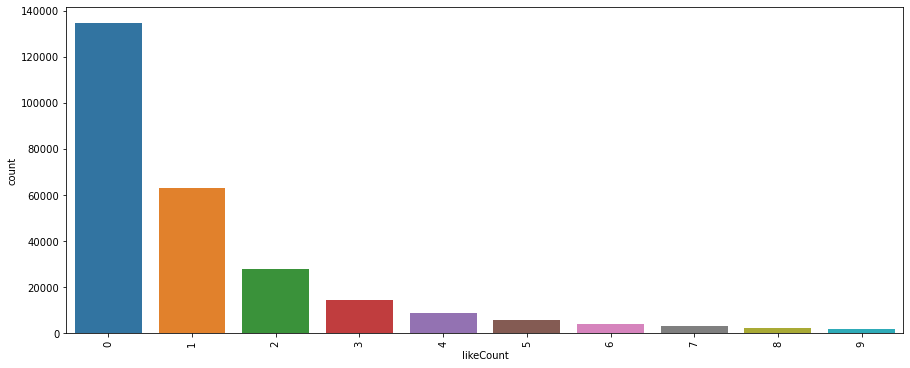

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='likeCount', order=df["likeCount"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

# Faccio esplorazione sui contenuti realtivi al numero maggiore e minore di Likes, Mentions, Replies --> dataset italiano e inglese

In [30]:
#CERCO I TWEET CON IL MAGGIOR NUMERO DI LIKE

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('likeCount', ascending=False)

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'likeCount']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets


,tweetText,likeCount
8844,Writing erotic prompts for Chat GPT hoping to be the first person to make AI cum. It’s like the Turing Test,62862
114458,Writing erotic prompts for Chat GPT hoping to be the first person to make AI cum. It’s like the Turing Test,62862
220074,AI tools that didn't exist one year ago:\n\nChatGPT\nWhisper\nGPT-3\nCodex\nGitHub Copilot\nInstructGPT\nText-to-product\nAI slides\nDALLE + API\nMidjourney\nStable Diffusion\nRunway videos\nEmail AI\nAI chrome extensions\nReplit Ghostwriter\nNo-code AI app builders\nBen's bites 😉\n\nwhat else?,37904
241064,ChatGPT is incredible! https://t.co/OPobybHLQF,30353
257048,"Alarm: ChatGPT by @OpenAI now *expressly prohibits arguments for fossil fuels*. (It used to offer them.) Not only that, it excludes nuclear energy from its counter-suggestions.\n\n@sama, what is the reason for this policy? https://t.co/M5q3yblgnF",26406


In [31]:
#CERCO I TWEET CON IL MINOR NUMERO DI LIKE

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('likeCount')

# Selezionare i primi 10 tweet con il numero di likes più alto
top_10_tweets = df_sorted.head(10)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_10_tweets = top_10_tweets[['tweetText', 'likeCount']]

# Stampa del DataFrame con i primi 10 tweet e i relativi contenuti
top_10_tweets


,tweetText,likeCount
0,"Planning to use #ChatGPT to help you with high school math? Maybe you should think twice, or at least consider a plan B. https://t.co/2ReLXamD30",0
207565,"@PaulNic76089645 @unusual_whales @Anonymous3_6_9_ You’ll like these two items, but the video may get put behind paywall any minute. \n\nhttps://t.co/czgApa2m97\n\nChatGPT cited ""bogus"" cases for a New York federal court filing\n\nhttps://t.co/5Taor76fcE",0
103002,@crazyclipsonly they are the same all over the world… why?,0
103001,@BatranAbdi @HonHajisheikhow hii ni chat gpt,0
103000,@hwchung27 are you using chatGPT to evaluate?,0
102999,Can ChatGPT help cybersecurity experts fight off attacks? Many experts are exploring that application.\n \n#ChatGPT #AICybersecurity https://t.co/baOFWQ1sOV,0
102997,Can ChatGPT help cybersecurity experts fight off attacks? Many experts are exploring that application.\n \n#ChatGPT #AICybersecurity https://t.co/PT0KHRW3gG,0
102996,Can ChatGPT help cybersecurity experts fight off attacks? Many experts are exploring that application.\n \n#ChatGPT #AICybersecurity https://t.co/HwI2fIvs8J,0
102995,Can ChatGPT help cybersecurity experts fight off attacks? Many experts are exploring that application.\n \n#ChatGPT #AICybersecurity https://t.co/meRWgFhSjC https://t.co/SnrvDj8wcm,0
102994,Can ChatGPT help cybersecurity experts fight off attacks? Many experts are exploring that application.\n \n#ChatGPT #AICybersecurity https://t.co/CXU8yFeU5L https://t.co/4Ij5Sz6VUh,0


# Retweet Count 


In [36]:
df.head(3)

,user,date,likeCount,tweetText,hashtags,lang,replies,retweetCount,replyCount
0,jdemay,2023-02-05 23:59:16+00:00,0,"Planning to use #ChatGPT to help you with high school math? Maybe you should think twice, or at least consider a plan B. https://t.co/2ReLXamD30",['ChatGPT'],en,0.0,0.0,NaN
1,CarlosSilvaB81,2023-02-05 23:58:51+00:00,3,"@Carmtans @stkirsch Chat gpt, is nothing but a super search engine, programmed by woke 💩💩💩 . Stop calling it an AI.",NaN,en,0.0,0.0,NaN
2,saadnajeebsaad,2023-02-05 23:58:15+00:00,0,#WeatherUpdate #Karachi #Khi #TempUpdate #Sunrise #Sunset #HourlyUpdate\nSunrise: 07:12 AM Sunset: 06:19 PM\nCurrent Temp: 21 C\nHumidity: 88 %\nWind Speed: 11.124 km/hr\nStatus: Smoke\n2023-02-06 04:58 AM\nGenerated based on instructions from #chatgpt #openAI,"['WeatherUpdate', 'Karachi', 'Khi', 'TempUpdate', 'Sunrise', 'Sunset', 'HourlyUpdate', 'chatgpt', 'openAI']",en,0.0,0.0,NaN


In [37]:
#CERCO I TWEET CON IL MAGGIOR NUMERO DI Retweet count 

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('retweetCount', ascending=False)

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'retweetCount']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets


,tweetText,retweetCount
220074,AI tools that didn't exist one year ago:\n\nChatGPT\nWhisper\nGPT-3\nCodex\nGitHub Copilot\nInstructGPT\nText-to-product\nAI slides\nDALLE + API\nMidjourney\nStable Diffusion\nRunway videos\nEmail AI\nAI chrome extensions\nReplit Ghostwriter\nNo-code AI app builders\nBen's bites 😉\n\nwhat else?,8815.0
257048,"Alarm: ChatGPT by @OpenAI now *expressly prohibits arguments for fossil fuels*. (It used to offer them.) Not only that, it excludes nuclear energy from its counter-suggestions.\n\n@sama, what is the reason for this policy? https://t.co/M5q3yblgnF",5417.0
203957,"AI BANNED IN ITALY, after regulators found ChatGPT ILLEGALLY and unethically scraped/processed user data and materials without consent or compensation. Italy becomes the FIRST country to stand up for human rights against unethical AI by banning ChatGPT. \n\nINVESTIGATIONS are now… https://t.co/4DhNIxF97S",4012.0
36793,Ispolink has been incorporating #AI long before #ChatGPT become extremely popular 💥\n\n📘Learn how $ISP disrupts the workforce space by utilizing #AI to offer game-changing products 👇 https://t.co/I6OTNnKw0b,3563.0
142399,Ispolink has been incorporating #AI long before #ChatGPT become extremely popular 💥\n\n📘Learn how $ISP disrupts the workforce space by utilizing #AI to offer game-changing products 👇 https://t.co/I6OTNnKw0b,3563.0


In [38]:
#CERCO I TWEET CON IL MINOR NUMERO DI MENTIONS ---> mi viene 1 è un po' strano

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('retweetCount')

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'retweetCount']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets

,tweetText,retweetCount
0,"Planning to use #ChatGPT to help you with high school math? Maybe you should think twice, or at least consider a plan B. https://t.co/2ReLXamD30",0.0
184638,"I’m not sure how I feel about #ChatGPT just yet, especially its use in education, but I hope that decisions around how to mitigate/regulate its use don’t consider students w/ disabilities and SpLDs (dyslexia, dyspraxia, etc) last.",0.0
184639,"@Vesp__ @marouane53 The bigger they are the harder they fall, just imagine chat gpt included in every website and software you use",0.0
184640,It was fun while it lasted!🥺\n#ChatGPT #ChatGPTPro @OpenAI #AI #artificalintelligence https://t.co/lrVpdR11X7,0.0
184641,Seems that #ChatGPT will continue to be available also for free.,0.0


In [39]:
#CERCO I TWEET CON IL MAGGIOR NUMERO DI REPLIES 

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('replies', ascending=False)

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'replies']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets

,tweetText,replies
142399,Ispolink has been incorporating #AI long before #ChatGPT become extremely popular 💥\n\n📘Learn how $ISP disrupts the workforce space by utilizing #AI to offer game-changing products 👇 https://t.co/I6OTNnKw0b,6009.0
36793,Ispolink has been incorporating #AI long before #ChatGPT become extremely popular 💥\n\n📘Learn how $ISP disrupts the workforce space by utilizing #AI to offer game-changing products 👇 https://t.co/I6OTNnKw0b,6009.0
177023,I’ve Created a Complete Guide On How To Use Chat GPT For Copywriting\n\nThis Has The Potential To Help You Earn $10k+ p/m in 2023.\n\nAnd It’s Yours For FREE.\n\n Like &amp; Comment “Chat” and I’ll DM you a copy.\n\n(Must be following or I can’t send) https://t.co/kLKiQyIqZ0,4094.0
71446,I’ve Created a Complete Guide On How To Use Chat GPT For Copywriting\n\nThis Has The Potential To Help You Earn $10k+ p/m in 2023.\n\nAnd It’s Yours For FREE.\n\n Like &amp; Comment “Chat” and I’ll DM you a copy.\n\n(Must be following or I can’t send) https://t.co/kLKiQyIqZ0,4094.0
257048,"Alarm: ChatGPT by @OpenAI now *expressly prohibits arguments for fossil fuels*. (It used to offer them.) Not only that, it excludes nuclear energy from its counter-suggestions.\n\n@sama, what is the reason for this policy? https://t.co/M5q3yblgnF",2560.0


In [40]:
#CERCO I TWEET CON IL MINOR NUMERO DI REPLIES 

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('replies')

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'replies']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets

,tweetText,replies
0,"Planning to use #ChatGPT to help you with high school math? Maybe you should think twice, or at least consider a plan B. https://t.co/2ReLXamD30",0.0
167060,"@SelfSupervisedL @ylecun So you seem to be living in a bubble when so many schilars are criticizing #chatgpt for its negative externalities: hallucinations, spewing out rubish, the potential for facilitating cybercrime, plagiarism, etc etc",0.0
167061,@saradietschy omg mrs. dietschy can u do 10 best things to do with chat gpt next pls,0.0
167062,Five days in class with ChatGPT. ~ Thomas Rid. https://t.co/gMr7b2dgaj #ChatGPT,0.0
167063,Great video on developing trading strategies and/or indicators using Pine scripts in Trading View with the help of ChatGPT.\n\nhttps://t.co/DbuKbtxS1M\n\n#ChatGPT #TradingView,0.0


In [41]:
from wordcloud import WordCloud, STOPWORDS

In [42]:

from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer


In [43]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 

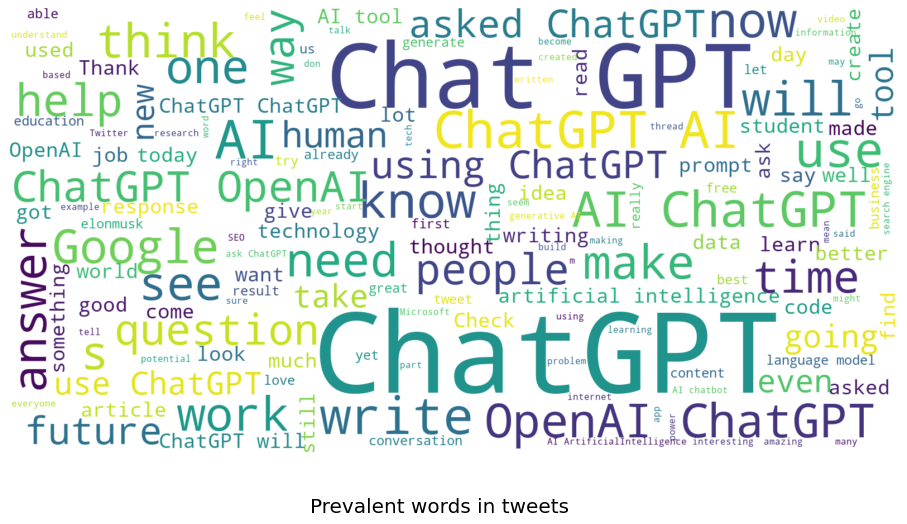

In [44]:
show_wordcloud(df['tweetText'], title = 'Prevalent words in tweets')

# Faccio sentiment analysis per sicurezza con il codice di Claudio

In [45]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [46]:
df['Sentiment'] = ''
for index, row in df.iterrows():
    comment = row['tweetText']
    
    # Applica VADER all'attuale commento
    scores = sia.polarity_scores(comment)
    compound_score = scores['compound']
    
    # Assegna un'etichetta di sentiment in base al punteggio compound
    if compound_score > 0:
        sentiment = 'pos'
    elif compound_score < 0:
        sentiment = 'neg'
    else:
        sentiment = 'neu'
    
    # Assegna l'etichetta di sentiment al DataFrame
    df.at[index, 'Sentiment'] = sentiment

# Stampa il DataFrame con le nuove etichette di sentiment
df['Sentiment'].value_counts()

pos    142430
neu     95570
neg     49309
Name: Sentiment, dtype: int64

In [47]:
sizes = df["Sentiment"].value_counts()
labels = df["Sentiment"].unique()

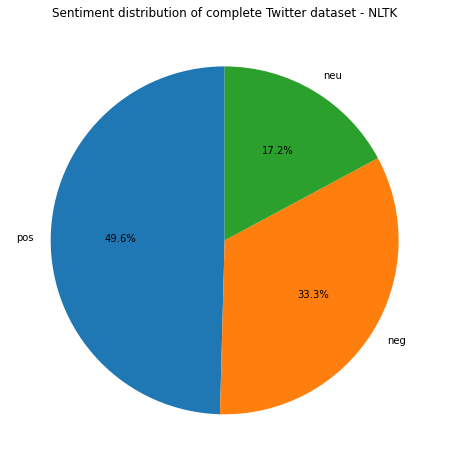

In [48]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = False, startangle = 90)
plt.title("Sentiment distribution of complete Twitter dataset - NLTK")
#plt.savefig("pie_nltksentiment-complete.png")
plt.show()

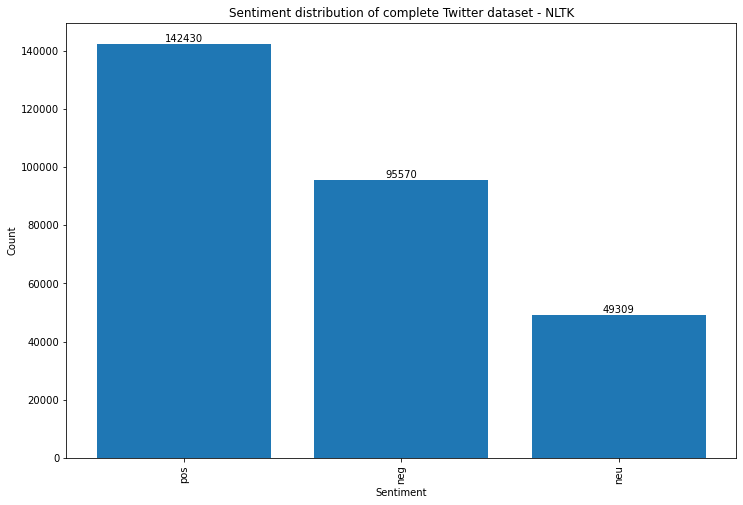

In [49]:
#faccio istogramma some sotto per controllare i valori
plt.rcParams["figure.figsize"] = [12, 8]

plt.bar(labels, sizes)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment distribution of complete Twitter dataset - NLTK")

# Aggiungi i valori sopra ogni barra
for i, v in enumerate(sizes):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks(rotation=90)
plt.show()


# Sembra che i valori tornino perché il sentiment analyzer usato è lo stesso

# Eseguo la sentiment anlaysis come funzione per fare altre ricerche 

In [50]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [51]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()



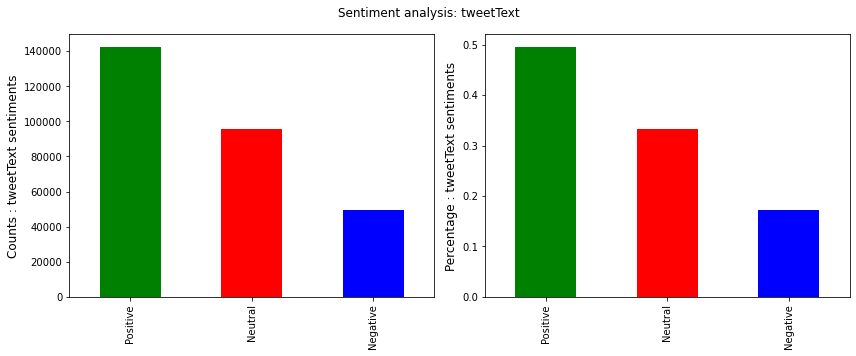

In [52]:
df['text_sentiment'] = df['tweetText'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'tweetText')

In [53]:
df['text_sentiment'].value_counts() #controllo che la funzione restituisca gli stessi valori di Claudio

Positive    142430
Neutral      95570
Negative     49309
Name: text_sentiment, dtype: int64

In [54]:
df.shape

(287309, 11)

# Devo inserire anche il contenuto per verificare che non ci siano errori perché non mi torna una cosa nel grafico in fondo

In [57]:
tweets_agg_df = df.groupby(["likeCount", "text_sentiment"]).first().reset_index()
tweets_agg_df = tweets_agg_df[['likeCount', 'text_sentiment', 'tweetText']]
tweets_agg_df.head(10)


,likeCount,text_sentiment,tweetText
0,0,Negative,. @Facebook's Resident #AI Guru Just Brutally Slammed #ChatGPT. (Futurism) https://t.co/8BwgSvom5Y https://t.co/jVh65Yom4j
1,0,Neutral,#WeatherUpdate #Karachi #Khi #TempUpdate #Sunrise #Sunset #HourlyUpdate\nSunrise: 07:12 AM Sunset: 06:19 PM\nCurrent Temp: 21 C\nHumidity: 88 %\nWind Speed: 11.124 km/hr\nStatus: Smoke\n2023-02-06 04:58 AM\nGenerated based on instructions from #chatgpt #openAI
2,0,Positive,"Planning to use #ChatGPT to help you with high school math? Maybe you should think twice, or at least consider a plan B. https://t.co/2ReLXamD30"
3,1,Negative,"As per agenda, question posed to #ChatGPT w.r.t the context of the 4th Industrial Revolution. Examine the answer, I consider it to be slightly misleading? Do you? \n\n""Will AI replace humans in the workplace completely?"" https://t.co/yi0GxAwjzD"
4,1,Neutral,Chat gpt is a degen 💀
5,1,Positive,#ChatGPT seems like a great way to start creating content but I find it impersonal ~ my suggestion~ one needs to add heart and soul and authenticity into the content too. Any thoughts?
6,2,Negative,"@__damille @OluseniShoks @Yorubaness @NaijaNation @Naijablogger Oh, really? Huh, that's very odd. Well, I could ask Chat GPT to come up with text descriptions of the different orisa."
7,2,Neutral,"""The big innovations will capture headlines. Incremental innovations will capture revenue."" - @v_vashishta in the latest issue of High ROI #DataScience. This is the right way to think about #ChatGPT, #Claude, and other the upcoming #AI advances https://t.co/WUuxatfBlq"
8,2,Positive,CHAT GPT Creates Me a 75% Win Rate Trading BOT! https://t.co/kJOtIeG5X2
9,3,Negative,"@Carmtans @stkirsch Chat gpt, is nothing but a super search engine, programmed by woke 💩💩💩 . Stop calling it an AI."


# Osservo i contenuti per verificare l'accuratezza della classificazione...

# Raggruppo i tweet in base al numero di like

In [58]:
tweets_agg_df = df.groupby(["likeCount", "text_sentiment"])["tweetText"].count().reset_index()
tweets_agg_df.columns = ["likeCount", "text_sentiment", "count"]
tweets_agg_df.head(5)

,likeCount,text_sentiment,count
0,0,Negative,23722
1,0,Neutral,48706
2,0,Positive,62386
3,1,Negative,10387
4,1,Neutral,20571


#questo codice non ha senso perché sono troppi dati

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="likeCount", y="count", hue="text_sentiment")
plt.xlabel("Nr. Likes")
plt.ylabel("Count")
plt.title("Number of Tweets by Likes and Sentiment")
plt.show()

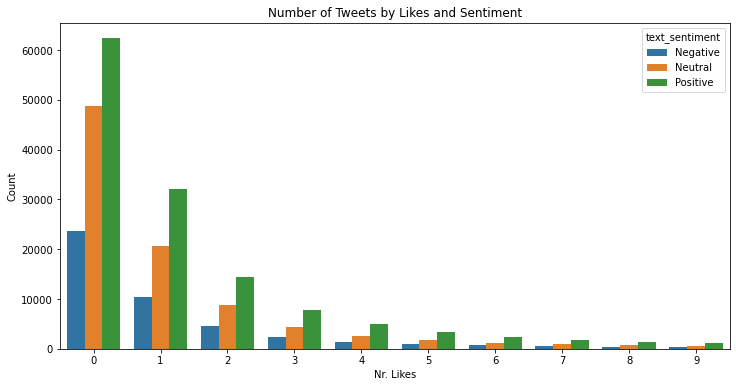

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="likeCount",order=df["likeCount"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.xlabel("Nr. Likes")
plt.ylabel("Count")
plt.title("Number of Tweets by Likes and Sentiment")
plt.show()


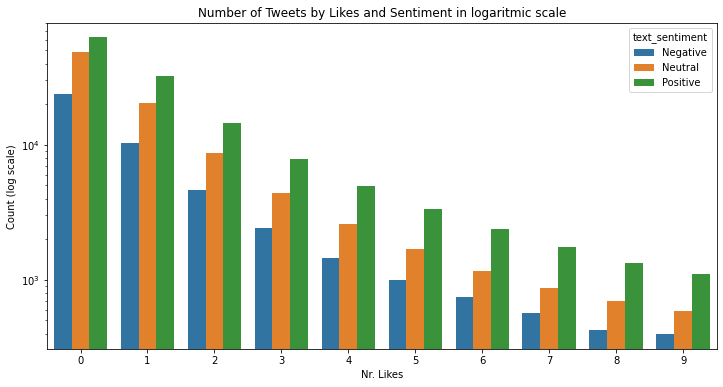

In [61]:
#Faccio il grafo in scala logaritmica (che se non ricordo male attenua le differenze) per visualizzare meglio
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="likeCount", order=df["likeCount"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.yscale('log')  # Imposta la scala logaritmica sull'asse y
plt.xlabel("Nr. Likes")
plt.ylabel("Count (log scale)")  # Aggiungi un'etichetta per l'asse y con scala logaritmica
plt.title("Number of Tweets by Likes and Sentiment in logaritmic scale")
plt.show()


In [62]:
#Eseguo stessa operazione per Replies
tweets_agg_df = df.groupby(["replies", "text_sentiment"])["tweetText"].count().reset_index()
tweets_agg_df.columns = ["replies", "text_sentiment", "count"]
tweets_agg_df.head(5)

,replies,text_sentiment,count
0,0.0,Negative,32426
1,0.0,Neutral,69194
2,0.0,Positive,94196
3,1.0,Negative,11188
4,1.0,Neutral,17587


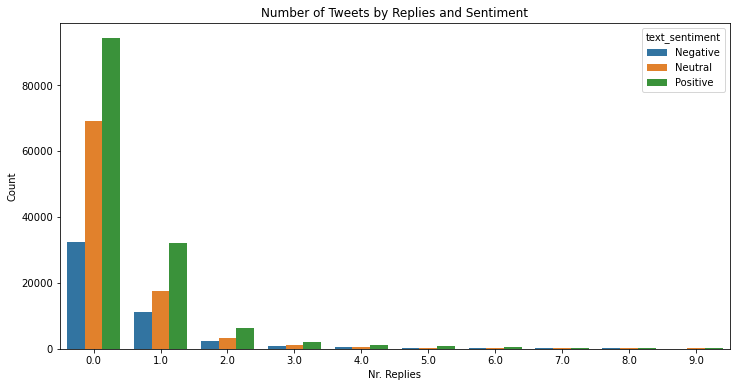

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="replies",order=df["replies"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.xlabel("Nr. Replies")
plt.ylabel("Count")
plt.title("Number of Tweets by Replies and Sentiment")
plt.show()


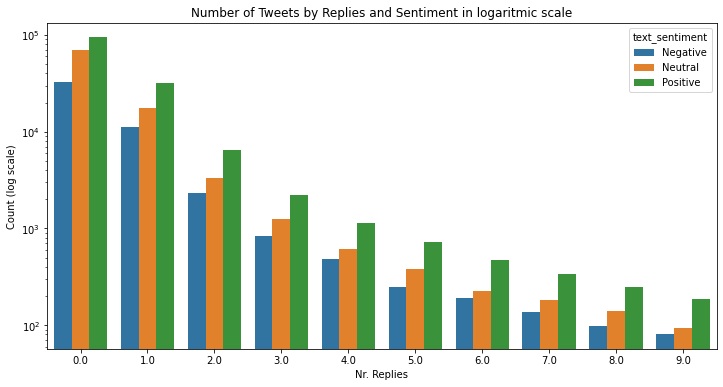

In [64]:
#Faccio il grafo in scala logaritmica (che se non ricordo male attenua le differenze) per visualizzare meglio
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="replies", order=df["replies"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.yscale('log')  # Imposta la scala logaritmica sull'asse y
plt.xlabel("Nr. Replies")
plt.ylabel("Count (log scale)")  # Aggiungi un'etichetta per l'asse y con scala logaritmica
plt.title("Number of Tweets by Replies and Sentiment in logaritmic scale")
plt.show()


# Dai grafici sembra che in generale le persone retwittano e mettono più like ai post classificati come "positivi" (in linea col sentimento)

# Provo a creare wordcloud con le parole dei tweet che hanno più like --> positivi e negativi

In [65]:
stopwords = set(STOPWORDS)

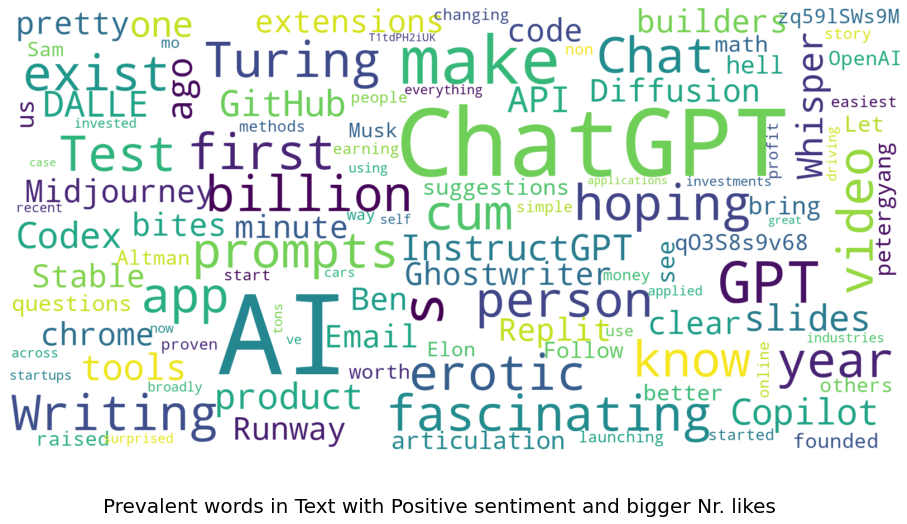

In [69]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object", "y"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 
# Filtra i dati per testo positivo e i 10 maggiori numeri di like
positive_top_likes = df.loc[df['text_sentiment'] == "Positive"].nlargest(10, 'likeCount')

# Ottieni i contenuti dei tweet
positive_text = positive_top_likes['tweetText']

# Mostra la nuvola di parole
show_wordcloud(positive_text, title='Prevalent words in Text with Positive sentiment and bigger Nr. likes')


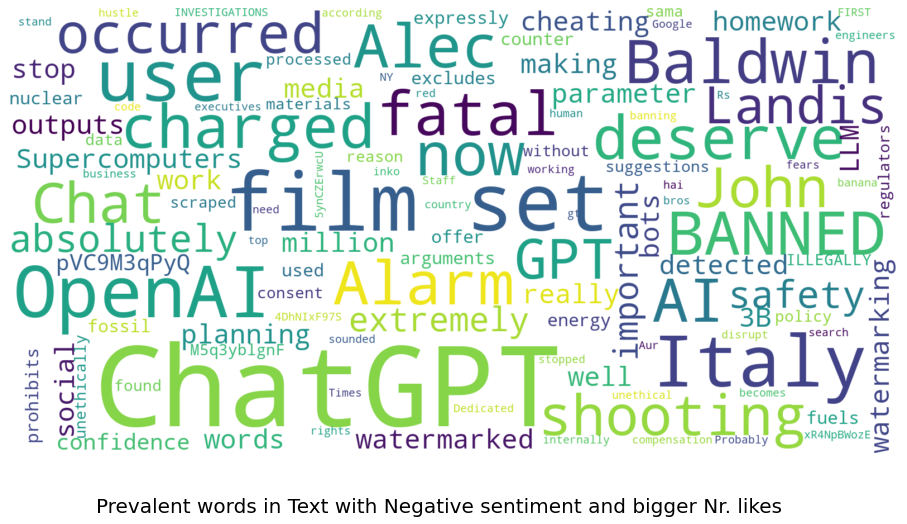

In [70]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 
# Filtra i dati per testo positivo e i 10 maggiori numeri di like
positive_top_likes = df.loc[df['text_sentiment'] == "Negative"].nlargest(10, 'likeCount')

# Ottieni i contenuti dei tweet
positive_text = positive_top_likes['tweetText']

# Mostra la nuvola di parole
show_wordcloud(positive_text, title='Prevalent words in Text with Negative sentiment and bigger Nr. likes')


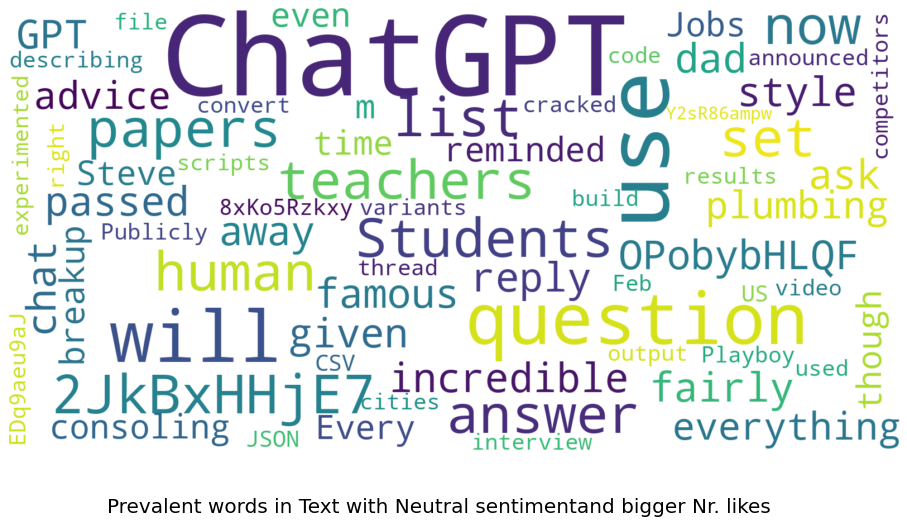

In [71]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 
# Filtra i dati per testo positivo e i 10 maggiori numeri di like
positive_top_likes = df.loc[df['text_sentiment'] == "Neutral"].nlargest(10, 'likeCount')

# Ottieni i contenuti dei tweet
positive_text = positive_top_likes['tweetText']

# Mostra la nuvola di parole
show_wordcloud(positive_text, title='Prevalent words in Text with Neutral sentimentand bigger Nr. likes')


# Provo a fare i barplot ma per i contenuti non funzionano

/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


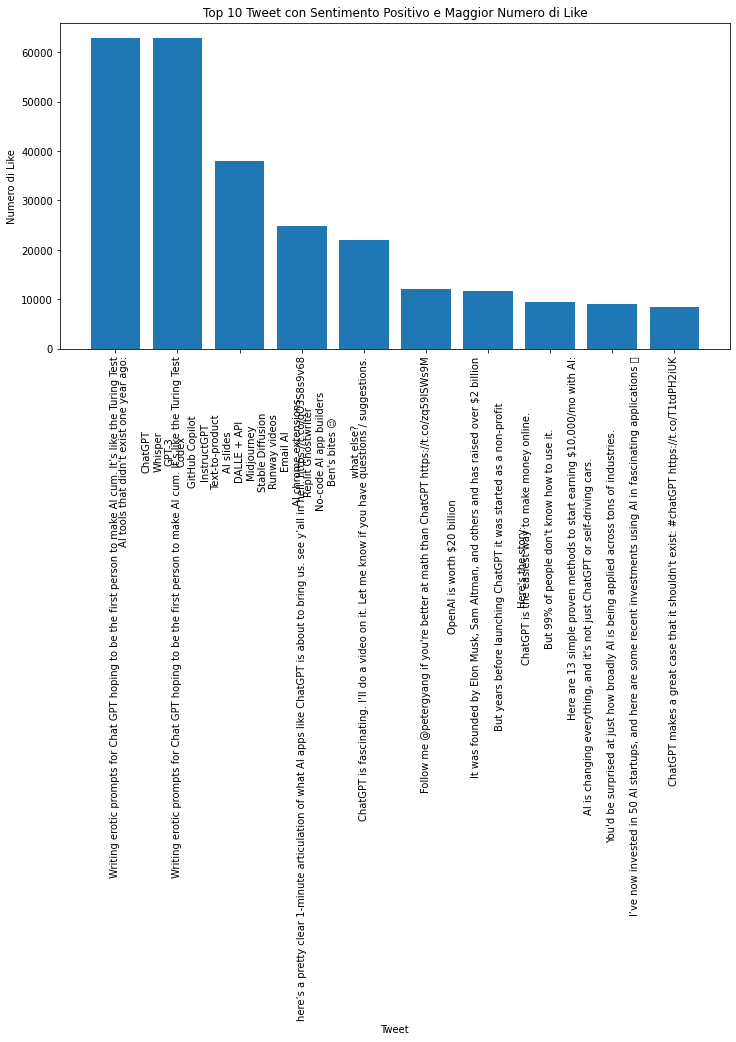

In [76]:
import matplotlib.pyplot as plt

# Filtra i dati per testo positivo e i 10 maggiori numeri di like
neutral_top_likes = df.loc[df['text_sentiment'] == "Positive"].nlargest(10, 'likeCount')

# Ottieni i contenuti dei tweet
neutral_text = neutral_top_likes['tweetText']

# Tracciamento del barplot
plt.figure(figsize=(12, 6))
plt.bar(range(len(neutral_text)), neutral_top_likes['likeCount'])
plt.xticks(range(len(neutral_text)), neutral_text, rotation=90)
plt.xlabel('Tweet')
plt.ylabel('Numero di Like')
plt.title('Top 10 Tweet con Sentimento Positivo e Maggior Numero di Like')
plt.show()


/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


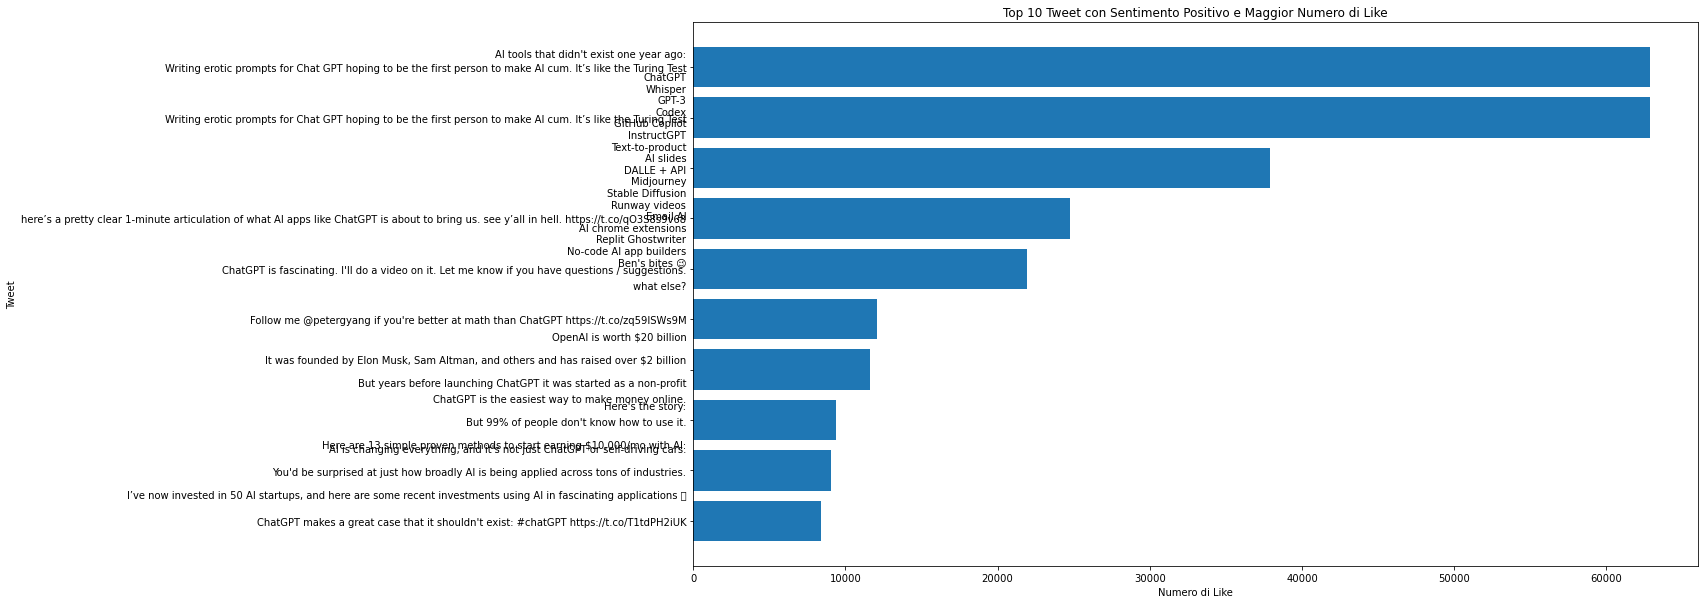

In [77]:
#Sentimento positivo

import matplotlib.pyplot as plt

# Filtra i dati per testo positivo e i 10 maggiori numeri di like
neutral_top_likes = df.loc[df['text_sentiment'] == "Positive"].nlargest(10, 'likeCount')

# Inverti l'ordine dei dati in modo che il tweet con più like sia in alto
neutral_top_likes = neutral_top_likes.iloc[::-1]

# Ottieni i contenuti dei tweet
neutral_text = neutral_top_likes['tweetText']

# Tracciamento del barplot
plt.figure(figsize=(18, 10))
plt.barh(range(len(neutral_text)), neutral_top_likes['likeCount'])
plt.yticks(range(len(neutral_text)), neutral_text)
plt.ylabel('Tweet')
plt.xlabel('Numero di Like')
plt.title('Top 10 Tweet con Sentimento Positivo e Maggior Numero di Like')
plt.show()



/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129525 (\N{SPOOL OF THREAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129313 (\N{CLOWN FACE}) missing from

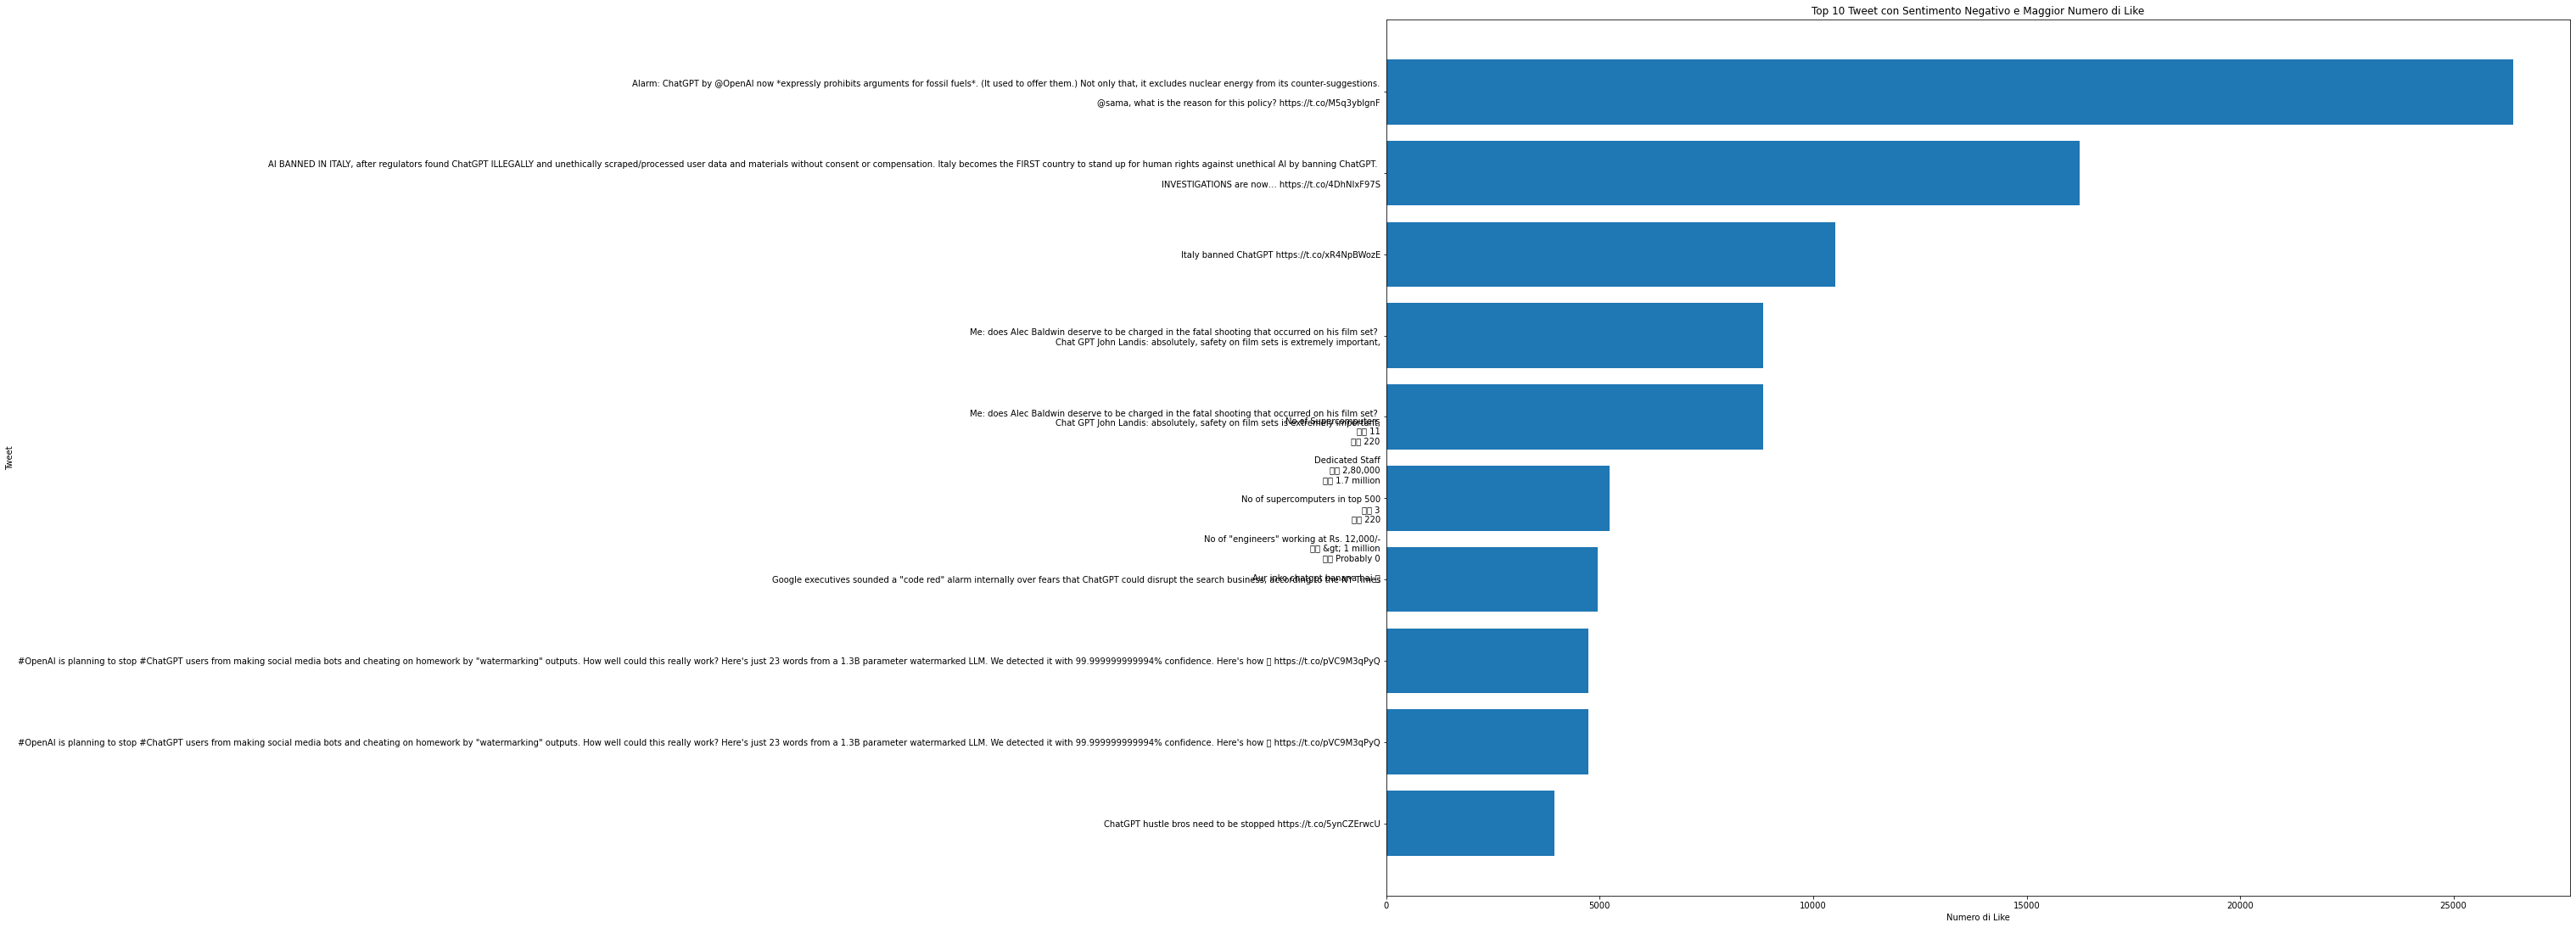

In [78]:
#Sentimento negativo 

import matplotlib.pyplot as plt

# Filtra i dati per testo positivo e i 10 maggiori numeri di like
neutral_top_likes = df.loc[df['text_sentiment'] == "Negative"].nlargest(10, 'likeCount')

# Inverti l'ordine dei dati in modo che il tweet con più like sia in alto
neutral_top_likes = neutral_top_likes.iloc[::-1]

# Ottieni i contenuti dei tweet
neutral_text = neutral_top_likes['tweetText']

# Tracciamento del barplot
plt.figure(figsize=(25, 19))
plt.barh(range(len(neutral_text)), neutral_top_likes['likeCount'])
plt.yticks(range(len(neutral_text)), neutral_text)
plt.ylabel('Tweet')
plt.xlabel('Numero di Like')
plt.title('Top 10 Tweet con Sentimento Negativo e Maggior Numero di Like')
plt.show()

/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


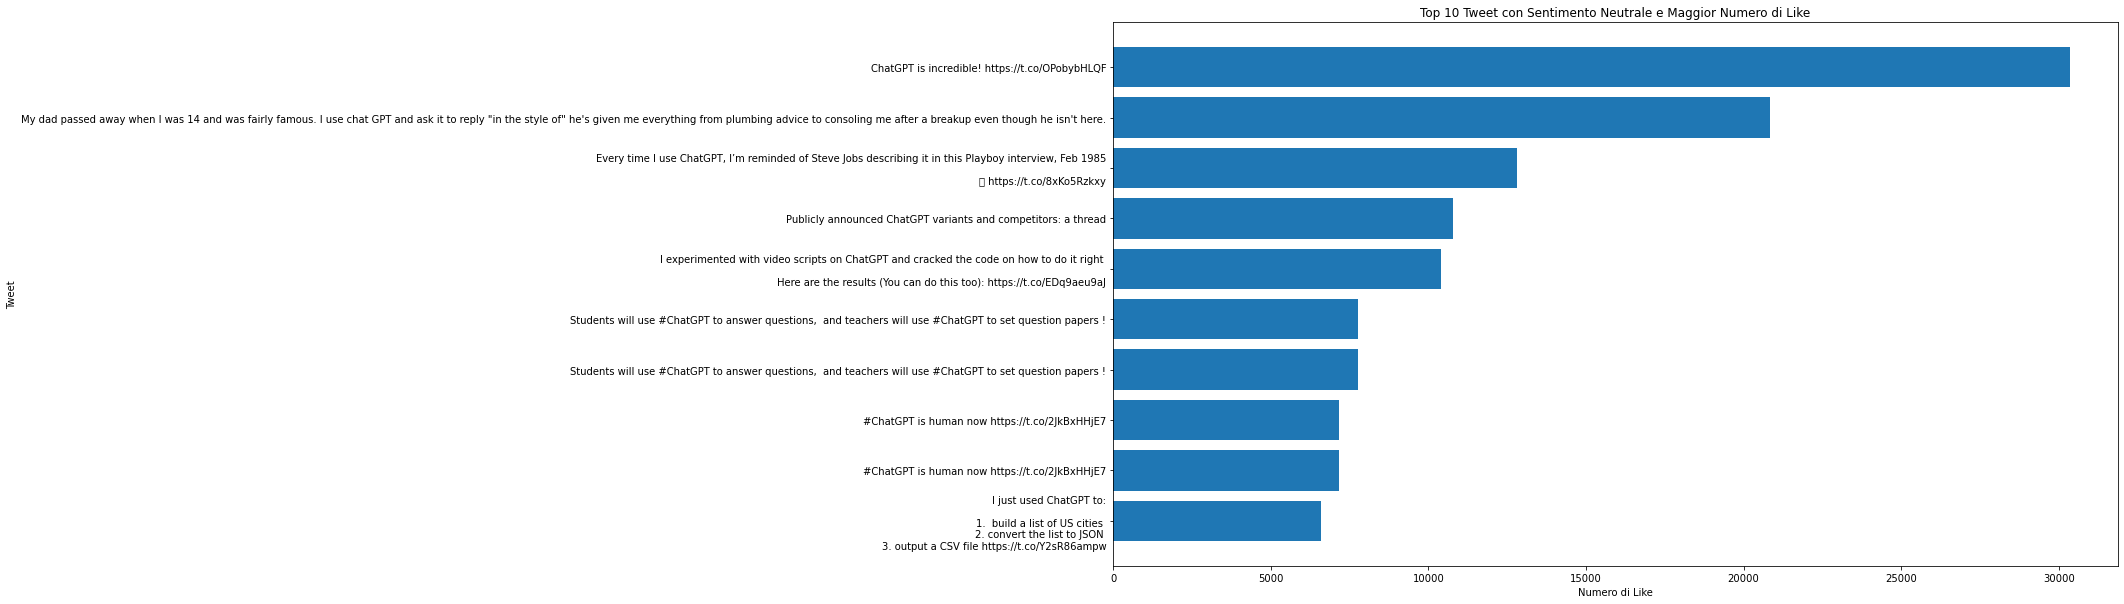

In [79]:
#Sentimento neutrale

import matplotlib.pyplot as plt

# Filtra i dati per testo neutrale e i 10 maggiori numeri di like
neutral_top_likes = df.loc[df['text_sentiment'] == "Neutral"].nlargest(10, 'likeCount')

# Inverti l'ordine dei dati in modo che il tweet con più like sia in alto
neutral_top_likes = neutral_top_likes.iloc[::-1]

# Ottieni i contenuti dei tweet
neutral_text = neutral_top_likes['tweetText']

# Tracciamento del barplot
plt.figure(figsize=(18, 10))
plt.barh(range(len(neutral_text)), neutral_top_likes['likeCount'])
plt.yticks(range(len(neutral_text)), neutral_text)
plt.ylabel('Tweet')
plt.xlabel('Numero di Like')
plt.title('Top 10 Tweet con Sentimento Neutrale e Maggior Numero di Like')
plt.show()

